In [1]:
import numpy as np
import pandas as pd
%load_ext autoreload
%autoreload 2
import Edhec_risk_kit as erk


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dframe = erk.ret_dframe_devNorm("data/edhec-hedgefundindices.csv")
dframe.head()

,Convertible Arbitrage,CTA Global,Distressed Securities,Emerging Markets,Equity Market Neutral,Event Driven,Fixed Income Arbitrage,Global Macro,Long/Short Equity,Merger Arbitrage,Relative Value,Short Selling,Funds Of Funds
date,,,,,,,,,,,,,
1997-01,0.0119,0.0393,0.0178,0.0791,0.0189,0.0213,0.0191,0.0573,0.0281,0.0150,0.0180,-0.0166,0.0317
1997-02,0.0123,0.0298,0.0122,0.0525,0.0101,0.0084,0.0122,0.0175,-0.0006,0.0034,0.0118,0.0426,0.0106
1997-03,0.0078,-0.0021,-0.0012,-0.0120,0.0016,-0.0023,0.0109,-0.0119,-0.0084,0.0060,0.0010,0.0778,-0.0077
1997-04,0.0086,-0.0170,0.0030,0.0119,0.0119,-0.0005,0.0130,0.0172,0.0084,-0.0001,0.0122,-0.0129,0.0009
1997-05,0.0156,-0.0015,0.0233,0.0315,0.0189,0.0346,0.0118,0.0108,0.0394,0.0197,0.0173,-0.0737,0.0275


# Semideviation

In [4]:
dframe.std(ddof=0)

Convertible Arbitrage     0.016536
CTA Global                0.023290
Distressed Securities     0.017009
Emerging Markets          0.032476
Equity Market Neutral     0.008115
Event Driven              0.016712
Fixed Income Arbitrage    0.011517
Global Macro              0.014694
Long/Short Equity         0.019897
Merger Arbitrage          0.009600
Relative Value            0.011462
Short Selling             0.047655
Funds Of Funds            0.015536
dtype: float64

In [5]:
dframe[dframe<0].std(ddof=0)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

In [10]:
erk.semideviation(dframe)

Convertible Arbitrage     0.019540
CTA Global                0.012443
Distressed Securities     0.015185
Emerging Markets          0.028039
Equity Market Neutral     0.009566
Event Driven              0.015429
Fixed Income Arbitrage    0.017763
Global Macro              0.006579
Long/Short Equity         0.014051
Merger Arbitrage          0.008875
Relative Value            0.012244
Short Selling             0.027283
Funds Of Funds            0.012122
dtype: float64

# VaR and CVaR

Value at Risk
- Historic VaR
- Parametric VaR
- Modified Cornish-Fisher Var

In [13]:
np.percentile(dframe,5, axis=0)

array([-0.01576, -0.03169, -0.01966, -0.04247, -0.00814, -0.02535,
       -0.00787, -0.01499, -0.02598, -0.01047, -0.01174, -0.06783,
       -0.02047])

In [20]:
erk.var_historic(dframe)

Convertible Arbitrage    -0.01576
CTA Global               -0.03169
Distressed Securities    -0.01966
Emerging Markets         -0.04247
Equity Market Neutral    -0.00814
Event Driven             -0.02535
Fixed Income Arbitrage   -0.00787
Global Macro             -0.01499
Long/Short Equity        -0.02598
Merger Arbitrage         -0.01047
Relative Value           -0.01174
Short Selling            -0.06783
Funds Of Funds           -0.02047
dtype: float64

In [21]:
import scipy.stats as st

In [26]:
z=st.norm.ppf(0.02)

In [27]:
z

-2.053748910631823

In [29]:
-(dframe.mean()+z*dframe.std(ddof=0))

Convertible Arbitrage     0.028452
CTA Global                0.043758
Distressed Securities     0.027987
Emerging Markets          0.060443
Equity Market Neutral     0.012168
Event Driven              0.027977
Fixed Income Arbitrage    0.019288
Global Macro              0.024775
Long/Short Equity         0.034532
Merger Arbitrage          0.014361
Relative Value            0.017748
Short Selling             0.099572
Funds Of Funds            0.027645
dtype: float64

In [35]:
erk.var_gaussian(dframe,10)

Convertible Arbitrage     0.015683
CTA Global                0.025774
Distressed Securities     0.014852
Emerging Markets          0.035366
Equity Market Neutral     0.005901
Event Driven              0.015072
Fixed Income Arbitrage    0.010395
Global Macro              0.013428
Long/Short Equity         0.019168
Merger Arbitrage          0.006948
Relative Value            0.008897
Short Selling             0.062773
Funds Of Funds            0.015648
dtype: float64

In [4]:
df = pd.DataFrame({
    "Gaussian":erk.var_gaussian(dframe),
    "Historic":erk.var_historic(dframe),
    "Cornish-Fisher":erk.var_gaussian(dframe, modified=True)
})

In [5]:
df.head()

,Gaussian,Historic,Cornish-Fisher
Convertible Arbitrage,0.021691,-0.01576,0.029494
CTA Global,0.034235,-0.03169,0.033120
Distressed Securities,0.021032,-0.01966,0.026183
Emerging Markets,0.047164,-0.04247,0.054672
Equity Market Neutral,0.008850,-0.00814,0.012109


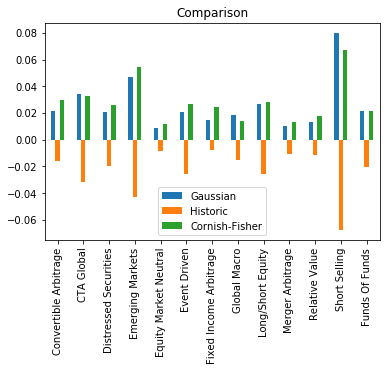

In [6]:
df.plot.bar(title="Comparison")